# Lasso Training on Full Data Set

In [1]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# read data into iterable
x_list = []
labels = []
names = []
first_line = True
data_path = './data/winequality-red.csv'

with open(data_path) as data:
    
    for line in data:
        
        if first_line:
            names = line.strip().split(';')
            first_line = False
            
        else:
            # split on semicolon
            row = line.strip().split(';')
            
            # put labels in separate array
            labels.append(float(row[-1]))
            
            # remove label from row
            row.pop()
            
            # convert row into floats
            float_row = [float(num) for num in row]
            x_list.append(float_row)

In [3]:
# Normalize columns in x and labels
# Note: be careful about normalization.  Some penalized regression packages include it and some don't.
n_rows = len(x_list)
n_cols = len(x_list[0])

# calculate means and variances
x_means = []
x_sd = []

for i in range(n_cols):
    col = [x_list[j][i] for j in range(n_rows)]
    mean = sum(col)/n_rows
    x_means.append(mean)
    
    col_diff = [(x_list[j][i] - mean) for j in range(n_rows)]
    sum_sq = sum([col_diff[i] ** 2 for i in range(n_rows)])
    std_dev = sqrt(sum_sq/n_rows)
    x_sd.append(std_dev)
    
# Use calculated mean and standard deviation to normalize x_list
x_normalized = []

for i in range(n_rows):
    row_normalized = [(x_list[i][j] - x_means[j])/x_sd[j] for j in range(n_cols)]
    x_normalized.append(row_normalized)
    
# Normalize labels
mean_label = sum(labels)/n_rows
sd_label = sqrt(sum([(labels[i] - mean_label) * (labels[i] - mean_label) for i in range(n_rows)])/n_rows)

label_normalized = [(labels[i] - mean_label)/sd_label for i in range(n_rows)]

In [4]:
# convert list of lists to np array for input to sklearn packages

# Unnormalized labels
y = np.array(labels)

# Normalized labels
y = np.array(label_normalized)

# Unnormalized x
x = np.array(x_list)

# Normalized x
x = np.array(x_normalized)



/home/michael/.virtualenvs/ml_in_py-5Jtq3_sG/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


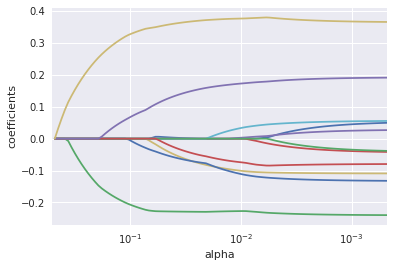

In [5]:
alphas, coefs, _ = linear_model.lasso_path(x, y, return_models=False)

plt.plot(alphas, coefs.T)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')
plt.semilogx()
ax = plt.gca()
ax.invert_xaxis()
plt.show()

In [6]:
n_attr, n_alpha = coefs.shape

# find coefficient ordering
nz_list = []

for i_alpha in range(1, n_alpha):
    coef_list = list(coefs[:, i_alpha])
    nz_coef = [index for index in range(n_attr) if coef_list[index] != 0.0]
    
    for q in nz_coef:
        
        if not (q in nz_list):
            nz_list.append(q)
            
name_list =  [names[nz_list[i]] for i in range(len(nz_list))]
print(f'Attributes Ordered by How Early They Enter the Model: {name_list}')

# find coefficients corresponding to best alpha value.
# alpha value corresponding to normalized x and normalized y is 0.013561387700964642
alpha_star = 0.013561387700964642
index_lt_alpha_star = [index for index in range(100) if alphas[index] > alpha_star]
index_star = max(index_lt_alpha_star)

# here's the set of coefficients to deploy
coef_star = list(coefs[:, index_star])
print(f'Best Coefficient Values: {coef_star}')

# The coefficients on normalized attributes give another slightly different ordering
abs_coef = [abs(a) for a in coef_star]

# sort by magnitude
coef_sorted = sorted(abs_coef, reverse=True)

idx_coef_size = [abs_coef.index(a) for a in coef_sorted if not (a == 0.0)]

names_list_2 = [names[idx_coef_size[i]] for i in range(len(idx_coef_size))]

print(f'Attributes Ordered by Coef Size at Optimum alpha {names_list_2}')

Attributes Ordered by How Early They Enter the Model: ['"alcohol"', '"volatile acidity"', '"sulphates"', '"total sulfur dioxide"', '"chlorides"', '"fixed acidity"', '"pH"', '"free sulfur dioxide"', '"residual sugar"', '"citric acid"', '"density"']
Best Coefficient Values: [0.0, -0.22773815784738846, -0.0, 0.0, -0.094239023363375432, 0.022151948563543376, -0.099036391332770965, -0.0, -0.067873612822591051, 0.1680410214183069, 0.37509573430881482]
Attributes Ordered by Coef Size at Optimum alpha ['"alcohol"', '"volatile acidity"', '"sulphates"', '"total sulfur dioxide"', '"chlorides"', '"pH"', '"free sulfur dioxide"']
